# <span style="color:#0b486b">  FIT5215: Deep Learning (2024)</span>
***
*CE/Lecturer (Clayton):*  **Dr Trung Le** | trunglm@monash.edu <br/>
*Lecturer (Clayton):* **Prof Dinh Phung** | dinh.phung@monash.edu <br/>
*Lecturer (Malaysia):*  **Dr Arghya Pal** | arghya.pal@monash.edu <br/>
*Lecturer (Malaysia):*  **Dr Lim Chern Hong** | lim.chernhong@monash.edu <br/>  <br/>
*Head Tutor 3181:*  **Miss Vy Vo** |  \[v.vo@monash.edu \] <br/>
*Head Tutor 5215:*  **Dr Van Nguyen** |  \[van.nguyen1@monash.edu \]

<br/> <br/>
Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **Peng**  <br/>
Firstname: **Yuhang**    <br/>
Student ID: **34278818**    <br/>
Email: **ypen0076@student.monash.edu**    <br/>
Your tutorial time: **LAB 05 MON 16:00**    <br/>
***

# <span style="color:#0b486b">Deep Neural Networks</span>
### Due: <span style="color:red">11:55pm Sunday, 8 September 2024</span>  (Sunday)

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **20%** to your final mark. Read the assignment instructions carefully.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to Moodle unit site. **By the due date, you are required to submit one  <span style="color:red; font-weight:bold">single zip file, named xxx_assignment01_solution.zip</span> where `xxx` is your student ID, to the corresponding Assignment (Dropbox) in Moodle**. You can use Google Colab to do Assigmnent 1 but you need to save it to an `*.ipynb` file to submit to the unit Moodle.

**More importantly, if you use Google Colab to do this assignment, you need to first make a copy of this notebook on your Google drive**.

***For example, if your student ID is <span style="color:red; font-weight:bold">12356</span>, then gather all of your assignment solution to folder, create a zip file named <span style="color:red; font-weight:bold">123456_assignment01_solution.zip</span> and submit this file.***

Within this zip folder, you **must** submit the following files:
1.	**Assignment01_solution.ipynb**:  this is your Python notebook solution source file.
1.	**Assignment01_output.html**: this is the output of your Python notebook solution *exported* in html format.
1.	Any **extra files or folder** needed to complete your assignment (e.g., images used in your answers).

Since the notebook is quite big to load and work together, one recommended option is to split solution into three parts and work on them seperately. In that case, replace **Assignment01_solution.ipynb** by three notebooks: **Assignment01_Part1_solution.ipynb**, **Assignment01_Part2_solution.ipynb** and **Assignment01_Part3_solution.ipynb**

**You can run your codes on Google Colab. In this case, you have to make a copy of your Google colab notebook including the traces and progresses of model training before submitting.**



## <span style="color:#0b486b">Part 1: Theory and Knowledge Questions</span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 30 points]<span></div>

The first part of this assignment is to demonstrate your knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the lectures and tutorials from weeks 1 to 4**. Going through these materials before attempting this part is highly recommended.

####  <span style="color:red">**Question 1.1**</span> **Activation function plays an important role in modern Deep NNs. For each of the activation functions below, state its output range, find its derivative (show your steps), and plot the activation fuction and its derivative**

<span style="color:red">**(a)**</span> Exponential linear unit (ELU): $\text{ELU}(x)=\begin{cases}
0.1\left(\exp(x)-1\right) & \text{if}\,x\leq0\\
x & \text{if}\,x>0
\end{cases}$
<div style="text-align: right"><span style="color:red">[1.5 points]</span></div>

<span style="color:red">**(b)**</span> Gaussian Error Linear Unit (GELU): $\text{GELU}(x)=x\Phi(x)$ where $\Phi(x)$ is the `probability cummulative function` of the standard Gaussian distribution or $\Phi(x) = \mathbb{P}\left(X\leq x\right)$ where $X \sim N\left(0,1\right)$. In addition, the GELU activation fuction (the link for the [main paper](https://arxiv.org/pdf/1606.08415v5.pdf)) has been widely used in the state-of-the-art Vision for Transformers (e.g., here is the link for [the main ViT paper](https://arxiv.org/pdf/2010.11929v2.pdf)).
<div style="text-align: right"><span style="color:red">[1.5 points]</span></div>

**(a) Exponential Linear Unit (ELU)** <br>
The ELU function is defined as: 
$$
\text{ELU}(x) =
\begin{cases}
0.1(e^x - 1) & \text{if } x \leq 0 \\
x & \text{if } x > 0
\end{cases}
$$
Output Range:
- For $x > 0$, ELU outputs $x$, so the range is $(0, +\infty)$.
- For $x <= 0$, ELU outputs $0.1(e^x-1)$, so the range is $(-0.1, 0]$.

Derivatives:
$$
\text{ELU}'(x) =
\begin{cases}
0.1 e^x & \text{if } x \leq 0 \\
1 & \text{if } x > 0
\end{cases}
$$

**(b) Gaussian Error Linear Unit (GELU)** <br>
The GELU function is defined as:
$$
\text{GELU}(x) = x \cdot \Phi(x)
$$
where $\Phi(x)$ is the cumulative distribution function (CDF) of the standard normal distribution, expressed as:
$$
\Phi(x) = \frac{1}{2} \left[ 1 + \text{erf} \left( \frac{x}{\sqrt{2}} \right) \right]
$$
Output Range: <br>
The output range of GELU is approximately $(-0.17, +\infty)$.

Derivative:
The derivative of GELU can be expressed as:
$$
\text{GELU}'(x) = \Phi(x) + x \cdot \phi(x)
$$
where $\phi(x)$ is the probability density function (PDF) of the standard normal distribution:
$$
\phi(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}
$$

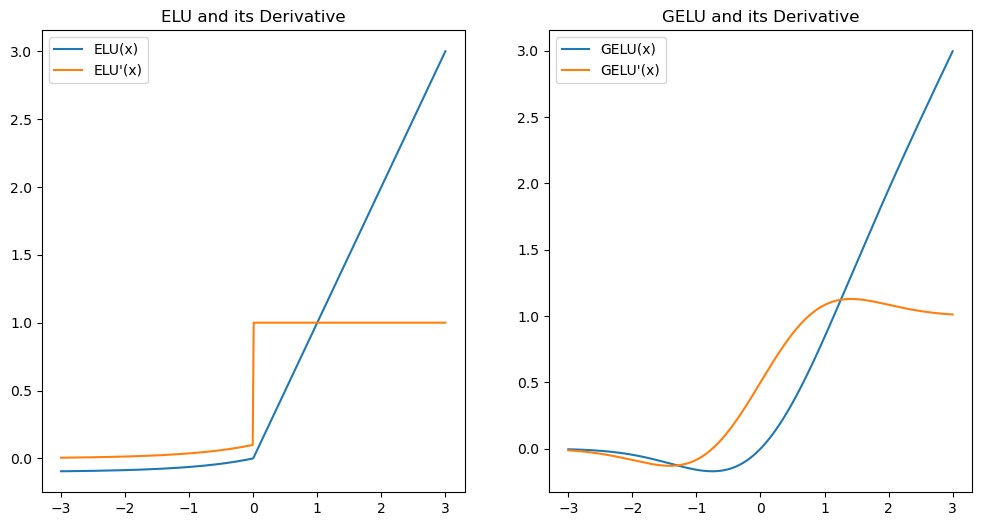

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

def elu(x):
    return np.where(x > 0, x, 0.1 * (np.exp(x) - 1))

def elu_derivative(x):
    return np.where(x > 0, 1, 0.1 * np.exp(x))

def gelu(x):
    return x * 0.5 * (1 + erf(x / np.sqrt(2)))

def gelu_derivative(x):
    phi_x = np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)
    return 0.5 * (1 + erf(x / np.sqrt(2))) + x * phi_x

x = np.linspace(-3, 3, 400)

# ELU and its derivative
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, elu(x), label='ELU(x)')
plt.plot(x, elu_derivative(x), label="ELU'(x)")
plt.title("ELU and its Derivative")
plt.legend()

# GELU and its derivative
plt.subplot(1, 2, 2)
plt.plot(x, gelu(x), label='GELU(x)')
plt.plot(x, gelu_derivative(x), label="GELU'(x)")
plt.title('GELU and its Derivative')
plt.legend()

plt.show()

####  <span style="color:red">**Question 1.2:**</span> **Assume that we feed a data point $x$ with a ground-truth label $y=3$ to the feed-forward neural network with the `ReLU activation` function as shown in the following figure**


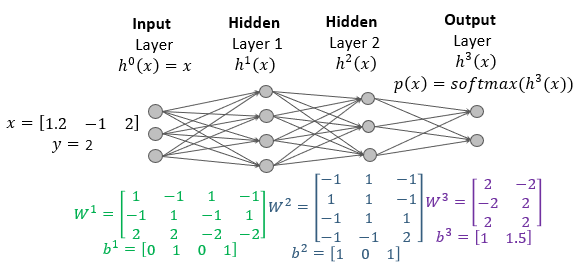

<span style="color:red">**(a)**</span>  What is the numerical value of the latent presentation $h^1(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

<span style="color:red">**(b)**</span>  What is the numerical value of the latent presentation $h^2(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

<span style="color:red">**(c)**</span>  What is the numerical value of the logit $h^3(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>


<span style="color:red">**(d)**</span>  What is the corresonding prediction probabilities $p(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

<span style="color:red">**(e)**</span>  What is the predicted label $\widehat{y}$? Is it a correct and an incorect prediction? Remind that $y=2$.
<div style="text-align: right"><span style="color:red">[1 point]</span></div>


<span style="color:red">**(f)**</span>  What is the cross-entropy loss caused by the feed-forward neural network at $(x,y)$? Remind that $y=2$.
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

<span style="color:red">**(g)**</span>  Why is the cross-entropy loss caused by the feed-forward neural network at $(x,y)$ (i.e., $\text{CE}(1_y, p(x))$) always non-negative? When does this $\text{CE}(1_y, p(x))$ loss get the value $0$? Note that you need to answer this question for a general pair $(x,y)$ and a general feed-forward neural network with, for example $M=4$ classes?   
<div style="text-align: right"><span style="color:red">[1 point]</span></div>


*You must show both formulas and numerical results for earning full mark. Although it is optional, it is great if you show your PyTorch code for your computation.*

**(a) Numerical Value of the Latent Representation $h^1(x)$** <br>
The latent representation $h^1(x)$ is the output of the first layer after applying the ReLU activation function to the weighted sum of the input $x$.
Given:
- The input $x$ and the weights $W^1$ for the first layer.
- The bias $b^1$ for the first layer.
The pre-activation output for the first layer is:
$$
z^1 = W^1 \cdot x + b^1
$$
Applying the ReLU activation function:
$$
h^1(x) = \text{ReLU}(z^1)
$$

**(b) Numerical Value of the Latent Representation $h^2(x)$** <br>
Similarly, $h^2(x)$ is the output of the second layer after applying the ReLU activation function to the weighted sum of $h^1(x)$.
Given:
- The weights $W^2$ for the second layer.
- The bias $b^2$ for the second layer.
The pre-activation output of the second layer is:
$$
z^2 = W^2 \cdot h^1(x) + b^2
$$
Applying the ReLU activation function:
$$
h^2(x) = \text{ReLU}(z^2)
$$

**(b) Numerical Value of the Logit $h^3(x)$** <br>
The logit $h^3(x)$ is the output of the third layer, which could be considered as the input to the softmax function in a classification task. In this case, it can be calculated using the weighted sum of $h^2(x)$.
Given:
- The weights $W^3$ for the third layer.
- The bias $b^3$ for the third layer.
The logit output is:
$$
h^3(x) = W^3 \cdot h^2(x) + b^3
$$

**(d) Prediction Probabilities $p(x)$** <br>
The prediction probabilities are obtained by applying the softmax function to the logits $h^3(x)$. The softmax function is defined as:
$$
p(x)=\frac{e^{h^3(x_i)}}{\sum_{i=1}^Me^{h^3(x_i)}}
$$
where $M$ is the number of classes.

**(e) Predicted Label $\hat{y}$** <br>
The predicted label is the class with the highest probability. It is a correct prediction shown in the output.

**(f) Cross-Entropy Loss** <br>
The cross-entropy loss is calculated between the predicted probabilities and the ground-truth label. It is defined as:
$$
\text{CE}(p(x), y) = -\log(p_y(x))
$$
where $p_y(x)$ is the predicted probability for the ground-truth class $y$.

**(g) Non-Negativity of Cross-Entropy Loss** <br>
The cross-entropy loss is always non-negative because it involves taking the logarithm of a probability, which is always a value between 0 and 1. The logarithm of any value between 0 and 1 is negative, and since we negate it in the cross-entropy formula, the final loss is non-negative. The loss is exactly zero when the predicted probability for the true class is 1 in the situation where $M=4$. 

In [2]:
import torch
import torch.nn.functional as F

# Define the input and the weights/biases for each layer
x = torch.tensor([1.2, -1.0, 2.0])

W1 = torch.tensor([[1, -1, 1, -1],
                   [-1, 1, -1, 1],
                   [2, 2, -2, -2]], dtype=torch.float32)

b1 = torch.tensor([0, 1, 0, 1], dtype=torch.float32)

W2 = torch.tensor([[-1, 1, -1],
                   [1, 1, -1],
                   [-1, 1, 1],
                   [-1, -1, 2]], dtype=torch.float32)

b2 = torch.tensor([1, 0, 1], dtype=torch.float32)

W3 = torch.tensor([[2, -2],
                   [-2, 2],
                   [2, 2]], dtype=torch.float32)

b3 = torch.tensor([1, 1.5], dtype=torch.float32)

# Layer 1: Compute z1 and apply ReLU activation
z1 = torch.matmul(x, W1) + b1
h1 = torch.relu(z1)

# Layer 2: Compute z2 and apply ReLU activation
z2 = torch.matmul(h1, W2) + b2
h2 = torch.relu(z2)

# Layer 3 (Output Layer): Compute z3 (logits)
z3 = torch.matmul(h2, W3) + b3

# Apply softmax to get the probabilities
p = F.softmax(z3, dim=0)

# Determine the predicted label (index of the maximum probability)
predicted_label = torch.argmax(p) + 1 # +1 to convert to 1-based index

# Let's assume ground-truth label is y = 2 (1-based index, which is index 1 in 0-base indexing)
y_true = 1 # In 0-based indexing, y = 2 is index 1

# Compute the cross-entropy loss
ce_loss = -torch.log(p[y_true])

# Print the results
print("z1:", z1)
print("h1 (after ReLU):", h1)
print("z2:", z2)
print("h2 (after ReLU):", h2)
print("z3 (logits):", z3)
print("Probabilities (softmax output):", p)
print("Predicted label:", predicted_label.item())
print("Cross-Entropy Loss:", abs(ce_loss.item()))

z1: tensor([ 6.2000,  2.8000, -1.8000, -5.2000])
h1 (after ReLU): tensor([6.2000, 2.8000, 0.0000, 0.0000])
z2: tensor([-2.4000,  9.0000, -8.0000])
h2 (after ReLU): tensor([0., 9., 0.])
z3 (logits): tensor([-17.0000,  19.5000])
Probabilities (softmax output): tensor([1.4069e-16, 1.0000e+00])
Predicted label: 2
Cross-Entropy Loss: 0.0


####  <span style="color:red">**Question 1.3:**</span>
For **Question 1.3**, you have two options:
* **(1)** *perform the forward, backward propagation, and SGD update for `one mini-batch`* (**10 points**), or
* **(2)** *manually implement a feed-forward neural network* that can work on real tabular datasets (**20 points**).

You can choose either **(1)** or **(2)** to proceed.   

### <span style="color:red">**Option 2**</span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this option: 20 points]<span></div>

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

**In Option 2, you need to implement a feed-forward NN manually using PyTorch and auto-differentiation of PyTorch. We then manually train the model on the MNIST dataset**.

We first download the `MNIST` dataset and preprocess it.

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to a tensor with shape [C, H, W]
    transforms.Normalize((0.5,), (0.5,)),  # Normalize to [-1, 1]
    transforms.Lambda(lambda x: x.view(28*28)) # Flatten the tensor to shape [-1,HW]
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_data, train_labels = train_dataset.data, train_dataset.targets
test_data, test_labels = test_dataset.data, test_dataset.targets
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████| 9912422/9912422 [00:18<00:00, 530681.94it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████| 28881/28881 [00:00<00:00, 84513.06it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████| 1648877/1648877 [00:02<00:00, 575866.37it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 4392559.09it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([10000, 28, 28]) torch.Size([10000])


Each data point has dimension `[28,28]`. We need to flatten it to a vector to input to our FFN.

In [5]:
train_dataset.data = train_data.data.view(-1, 28*28)
test_dataset.data = test_data.data.view(-1, 28*28)

train_data, train_labels = train_dataset.data, train_dataset.targets
test_data, test_labels = test_dataset.data, test_dataset.targets
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

torch.Size([60000, 784]) torch.Size([60000])
torch.Size([10000, 784]) torch.Size([10000])


In [6]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

**Develop the feed-forward neural networks**

**(a)** You need to develop the class `MyLinear` with the following skeleton

<div style="text-align: right"><span style="color:red">[3 points]</span></div>

In [7]:
class MyLinear(torch.nn.Module):
    def __init__(self, input_size, output_size):
        """
        input_size: the size of the input
        output_size: the size of the output
        """
        super(MyLinear, self).__init__()
        #Your code here
        self.fc = nn.Linear(input_size, output_size)

    #forward propagation
    def forward(self, x): #x is a mini-batch
        #Your code here
        return self.fc(x)

**(b)** You need to develop the class `MyFFN` with the following skeleton

<div style="text-align: right"><span style="color:red">[7 points]</span></div>

The update rule for SGD is:
$$
\theta = \theta - \eta \cdot \nabla \theta
$$
Where:
- $\theta$ are the model parameters (weights and biases).
- $\eta$ is the learning rate.
- $\nabla \theta$ is the gradient of the loss with respect to the parameters.

SGD with momentum adds a velocity term to accumulate the gradients over time. The update rules are:
$$
v_t = \mu \cdot v_{t-1} + \eta \cdot \nabla \theta \\
\theta = \theta - v_t
$$
Where:
- $v_t$ is the velocity at time step $t$.
- $\mu$ is the momentum factor.
- $\eta$ is the learning rate.
- $\nabla \theta$ is the gradient of the loss with respect to the parameters.

AdaGrad adapts the learning rate for each parameter based on the sum of the squares of the gradients. The update rules are:
$$
G_t = G_{t-1} + \nabla \theta \cdot \nabla \theta \\
\theta = \theta - \frac{\eta}{\sqrt{G_t} + \epsilon} \cdot \nabla \theta
$$
Where:
- $G_t$ is the sum of the squares of the gradients.
- $\eta$ is the learning rate.
- $\epsilon$ is a small constant added for numerical stability.
- $\nabla \theta$ is the gradient of the loss with respect to the parameters.

In [23]:
class MyFFN(torch.nn.Module):
    def __init__(self, input_size, num_classes, hidden_sizes, act = nn.ReLU()):
        """
        input_size: the size of the input
        num_classes: the number of classes
        act is the activation function
        hidden_sizes is the list of hidden sizes
        for example input_size = 3, hidden_sizes = [5, 7], num_classes = 4, and act = torch.nn.ReLU()
        means that we are building up a FFN with the configuration
        (3 (Input) -> 5 (ReLU) -> 7 (ReLU) -> 4 (Output))
        """
        super(MyFFN, self).__init__()
        self.input_size = input_size
        self.num_classes = num_classes
        self.act = act
        self.hidden_sizes = hidden_sizes
        self.num_layers = len(hidden_sizes) + 1
        # Your code here
        self.create_FFN()
        
    def create_FFN(self):
        """
        This function creates the feed-forward neural network
        We stack many MyLinear layers
        """
        #Your code here
        hidden_sizes = [self.input_size] + self.hidden_sizes + [self.num_classes]
        self.layers = nn.ModuleList()
        for i in range(self.num_layers):
            self.layers.append(MyLinear(hidden_sizes[i], hidden_sizes[i+1]))

    def forward(self,x):
        """
        This implements the forward propagation of the batch x
        This needs to return the prediction probabilities of x
        """
        #Your code here
        for layer in self.layers[:-1]:
            x = self.act(layer(x))
        x = self.layers[-1](x)
        return x
        
    def compute_loss(self, x, y):
        """
        This function computes the cross-entropy loss
        """
        #Your code here
        logits = self.forward(x)
        return F.cross_entropy(logits, y)
    
    def zero_grad(self):
        """
        Custom method to zero all the gradients in the network.
        """
        for layer in self.layers:
            if isinstance(layer, MyLinear):
                if layer.fc.weight.grad is not None:
                    layer.fc.weight.grad.zero_()  # Zero gradients
                if layer.fc.bias.grad is not None:
                    layer.fc.bias.grad.zero_()  # Zero gradients

    def update_SGD(self, x, y, learning_rate = 0.01):
        """
        This function updates the model parameters using SGD using the batch (x,y)
        """
        #Your code here
        loss = self.compute_loss(x, y)
        
        # Zero the gradients
        self.zero_grad()
        
        # Backward pass to compute gradients
        loss.backward()
        
        with torch.no_grad():
            for layer in self.layers:
                for param in layer.fc.parameters():
                    param -= learning_rate * param.grad
        
        return loss.item()

    def update_SGDwithMomentum(self, x, y, learning_rate = 0.01, momentum = 0.9):
        """
        This function updates the model parameters using SGD with momentum using the batch (x,y)
        """
        #Your code here
        loss = self.compute_loss(x, y)
        
        # Zero the gradients
        self.zero_grad()
        
        # Backward pass to compute gradients
        loss.backward()
        
        # Initialise velocities if they don't exist
        if not hasattr(self, 'velocities'):
            self.velocities = []
            for layer in self.layers:
                layer_velocities = []
                for param in layer.fc.parameters():
                    layer_velocities.append(torch.zeros_like(param))
                self.velocities.append(layer_velocities)
            
        # Manually update the parameters using SGD with momentum
        with torch.no_grad():
            for i, layer in enumerate(self.layers):
                for j, param in enumerate(layer.fc.parameters()):
                    self.velocities[i][j].mul_(momentum).add_(param.grad, alpha=learning_rate)
                    param -= self.velocities[i][j]
                
        return loss.item()

    def update_AdaGrad(self, x, y, learning_rate = 0.01, epsilon=1e-8):
        """
        This function updates the model parameters using AdaGrad using the batch (x,y)
        """
        #Your code here
        loss = self.compute_loss(x, y)
        
        # Zero the gradients
        self.zero_grad()
        
        # Backward pass to compute gradients
        loss.backward()
        
        # Initialise squared gradients if they don't exist
        if not hasattr(self, 'squared_gradients'):
            self.squared_gradients = []
            for layer in self.layers:
                layer_squared_gradients = []
                for param in layer.fc.parameters():
                    layer_squared_gradients.append(torch.zeros_like(param))
                self.squared_gradients.append(layer_squared_gradients)
            
        # Manually update the parameters using AdaGrad
        with torch.no_grad():
            for i, layer in enumerate(self.layers):
                for j, param in enumerate(layer.fc.parameters()):
                    self.squared_gradients[i][j].add_(param.grad.pow(2))
                    param -= learning_rate * param.grad / (self.squared_gradients[i][j].sqrt() + epsilon)
                
        return loss.item()

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [10]:
myFFN = MyFFN(input_size = 28*28, num_classes = 10, hidden_sizes = [100, 100], act = nn.ReLU()).to(device)
print(myFFN)

MyFFN(
  (act): ReLU()
  (layers): ModuleList(
    (0): MyLinear(
      (fc): Linear(in_features=784, out_features=100, bias=True)
    )
    (1): MyLinear(
      (fc): Linear(in_features=100, out_features=100, bias=True)
    )
    (2): MyLinear(
      (fc): Linear(in_features=100, out_features=10, bias=True)
    )
  )
)


**(c)** Write the code to evaluate the accuracy of the current `myFFN` model on a data loader (e.g., train_loader or test_loader).

<div style="text-align: right"><span style="color:red">[2.5 points]</span></div>

In [15]:
def compute_acc(model, data_loader):
    """
    This function computes the accuracy of the model on a data loader
    """
    #Your code here
    correct = 0
    totals = 0
    # Set model to eval mode for inference
    model.eval()
    for (batchX, batchY) in data_loader:
        # Move batchX and batchY to the same device as the model
        batchX, batchY = batchX.to(device), batchY.to(device)
        outputs = model(batchX) # feed batch to the model
        totals += batchY.size(0) # accumulate totals with the current batch size
        predicted = torch.argmax(outputs.data, 1) # get the predicted class
        correct += (predicted == batchY).sum().item()
    model.train()
    return correct / totals

**(c)** Write the code to evaluate the loss of the current `myFFN` model on a data loader (e.g., train_loader or test_loader).

<div style="text-align: right"><span style="color:red">[2.5 points]</span></div>

In [16]:
def compute_loss(model, data_loader):
    """
    This function computes the loss of the model on a data loader
    """
    #Your code here
    loss = 0.0
    # Set model to eval mode for inference
    model.eval()
    with torch.no_grad():
        for (batchX, batchY) in data_loader:
            # Move data to the same device as the model
            batchX, batchY = batchX.to(device), batchY.to(device)
            loss += model.compute_loss(batchX, batchY)
    model.train()
    return loss / len(data_loader)

Train on the `MNIST` data with 20 epochs using `updateSGD`.

In [13]:
myFFN = MyFFN(input_size = 28*28, num_classes = 10, hidden_sizes = [100, 100], act = nn.ReLU()).to(device)

In [17]:
num_epochs = 20
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
        x, y = x.to(device), y.to(device)
        myFFN.update_SGD(x, y, learning_rate = 0.01)
    train_acc = compute_acc(myFFN, train_loader)
    train_loss = compute_loss(myFFN, train_loader)
    test_acc = compute_acc(myFFN, test_loader)
    test_loss = compute_loss(myFFN, test_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc*100:.2f}%")

Epoch 1/20, Train Loss: 0.4564, Train Acc: 86.90%, Test Loss: 0.4348, Test Acc: 87.54%
Epoch 2/20, Train Loss: 0.3462, Train Acc: 90.04%, Test Loss: 0.3321, Test Acc: 90.55%
Epoch 3/20, Train Loss: 0.3133, Train Acc: 90.76%, Test Loss: 0.3041, Test Acc: 91.12%
Epoch 4/20, Train Loss: 0.2831, Train Acc: 91.72%, Test Loss: 0.2747, Test Acc: 91.96%
Epoch 5/20, Train Loss: 0.2941, Train Acc: 91.00%, Test Loss: 0.2882, Test Acc: 91.20%
Epoch 6/20, Train Loss: 0.2383, Train Acc: 93.04%, Test Loss: 0.2379, Test Acc: 93.05%
Epoch 7/20, Train Loss: 0.2215, Train Acc: 93.66%, Test Loss: 0.2227, Test Acc: 93.80%
Epoch 8/20, Train Loss: 0.2049, Train Acc: 94.14%, Test Loss: 0.2056, Test Acc: 94.09%
Epoch 9/20, Train Loss: 0.1883, Train Acc: 94.60%, Test Loss: 0.1911, Test Acc: 94.42%
Epoch 10/20, Train Loss: 0.1839, Train Acc: 94.74%, Test Loss: 0.1907, Test Acc: 94.47%
Epoch 11/20, Train Loss: 0.1653, Train Acc: 95.27%, Test Loss: 0.1668, Test Acc: 94.95%
Epoch 12/20, Train Loss: 0.1534, Train Ac

**(d)** Implement the function `updateSGDMomentum` in the class and train the model with this optimizer in `20` epochs. You can update the corresponding function in the `MyFNN` class.

<div style="text-align: right"><span style="color:red">[2.5 points]</span></div>

In [24]:
myFFN = MyFFN(input_size = 28*28, num_classes = 10, hidden_sizes = [100, 100], act = nn.ReLU()).to(device)

In [25]:
#Your code here
num_epochs = 20
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
        x, y = x.to(device), y.to(device)
        myFFN.update_SGDwithMomentum(x, y, learning_rate = 0.01)
    train_acc = compute_acc(myFFN, train_loader)
    train_loss = compute_loss(myFFN, train_loader)
    test_acc = compute_acc(myFFN, test_loader)
    test_loss = compute_loss(myFFN, test_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc*100:.2f}%")

Epoch 1/20, Train Loss: 0.1852, Train Acc: 94.47%, Test Loss: 0.1788, Test Acc: 94.50%
Epoch 2/20, Train Loss: 0.1456, Train Acc: 95.52%, Test Loss: 0.1562, Test Acc: 95.28%
Epoch 3/20, Train Loss: 0.0934, Train Acc: 97.11%, Test Loss: 0.1078, Test Acc: 96.57%
Epoch 4/20, Train Loss: 0.0891, Train Acc: 97.36%, Test Loss: 0.1104, Test Acc: 96.59%
Epoch 5/20, Train Loss: 0.0662, Train Acc: 97.97%, Test Loss: 0.0874, Test Acc: 97.16%
Epoch 6/20, Train Loss: 0.0580, Train Acc: 98.18%, Test Loss: 0.0867, Test Acc: 97.29%
Epoch 7/20, Train Loss: 0.0537, Train Acc: 98.28%, Test Loss: 0.0859, Test Acc: 97.23%
Epoch 8/20, Train Loss: 0.0488, Train Acc: 98.44%, Test Loss: 0.0862, Test Acc: 97.25%
Epoch 9/20, Train Loss: 0.0399, Train Acc: 98.73%, Test Loss: 0.0793, Test Acc: 97.68%
Epoch 10/20, Train Loss: 0.0487, Train Acc: 98.41%, Test Loss: 0.0854, Test Acc: 97.23%
Epoch 11/20, Train Loss: 0.0362, Train Acc: 98.83%, Test Loss: 0.0799, Test Acc: 97.56%
Epoch 12/20, Train Loss: 0.0297, Train Ac

**(e)** Implement the function `updateAdagrad` in the class and train the model with this optimizer in `20` epochs. You can update the corresponding function in the `MyFNN` class.

<div style="text-align: right"><span style="color:red">[2.5 points]</span></div>

In [26]:
myFFN = MyFFN(input_size = 28*28, num_classes = 10, hidden_sizes = [100, 100], act = nn.ReLU()).to(device)

In [27]:
#Your code here
num_epochs = 20
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
        x, y = x.to(device), y.to(device)
        myFFN.update_AdaGrad(x, y, learning_rate = 0.01)
    train_acc = compute_acc(myFFN, train_loader)
    train_loss = compute_loss(myFFN, train_loader)
    test_acc = compute_acc(myFFN, test_loader)
    test_loss = compute_loss(myFFN, test_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc*100:.2f}%")

Epoch 1/20, Train Loss: 0.2821, Train Acc: 91.16%, Test Loss: 0.2694, Test Acc: 91.45%
Epoch 2/20, Train Loss: 0.2114, Train Acc: 93.65%, Test Loss: 0.2040, Test Acc: 93.90%
Epoch 3/20, Train Loss: 0.1786, Train Acc: 94.68%, Test Loss: 0.1761, Test Acc: 94.73%
Epoch 4/20, Train Loss: 0.1758, Train Acc: 94.73%, Test Loss: 0.1722, Test Acc: 94.81%
Epoch 5/20, Train Loss: 0.1544, Train Acc: 95.44%, Test Loss: 0.1578, Test Acc: 95.20%
Epoch 6/20, Train Loss: 0.1445, Train Acc: 95.70%, Test Loss: 0.1493, Test Acc: 95.34%
Epoch 7/20, Train Loss: 0.1375, Train Acc: 95.87%, Test Loss: 0.1434, Test Acc: 95.61%
Epoch 8/20, Train Loss: 0.1316, Train Acc: 96.03%, Test Loss: 0.1388, Test Acc: 95.68%
Epoch 9/20, Train Loss: 0.1268, Train Acc: 96.17%, Test Loss: 0.1354, Test Acc: 95.86%
Epoch 10/20, Train Loss: 0.1247, Train Acc: 96.23%, Test Loss: 0.1356, Test Acc: 95.87%
Epoch 11/20, Train Loss: 0.1195, Train Acc: 96.35%, Test Loss: 0.1294, Test Acc: 95.92%
Epoch 12/20, Train Loss: 0.1145, Train Ac